# RNN

Basic Tokenizer

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the data
df = pd.read_csv("C:/Yee Ann/NUS/DSA4266/TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv")

# Remove columns with a single unique value
df = df.drop(columns=['Unnamed: 0', 'BinaryNumTarget'])
df = df.loc[:, df.nunique() > 1]
df = df.drop_duplicates()

# Convert boolean columns to 0 and 1
df['majority_target'] = df['majority_target'].astype(int)

# Tokenize the 'tweet' column
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet'])

# Convert text to sequences
X_text = tokenizer.texts_to_sequences(df['tweet'])
word_index = tokenizer.word_index

# Pad sequences to ensure they are the same length
max_length = 100  # Set max length of sequences
X_text = pad_sequences(X_text, maxlen=max_length, padding='post', truncating='post')

# Separate and scale numerical features
numerical_features = df.select_dtypes(['int64', 'int32', 'float64']).columns.tolist()
numerical_features.remove('majority_target')
X_num = df[numerical_features].values

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Combine text sequences and numerical features into one dataset
X_combined = np.hstack((X_text, X_num_scaled))

# Define the target variable
y = df['majority_target'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Build the RNN model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_split=0.2,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on test data
y_pred = model.predict(X_test)
y_pred_use = (y_pred > 0.5).astype(int)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred_use)
print(f"RNN Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred_use, average='weighted')
print(f"RNN F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_use, target_names=['Fake', 'Real']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_use))

c:\Users\laiye\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 577s 242ms/step - accuracy: 0.5093 - loss: 0.6934 - val_accuracy: 0.5409 - val_loss: 0.6895 - learning_rate: 0.0010
Epoch 2/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 457s 194ms/step - accuracy: 0.5383 - loss: 0.6896 - val_accuracy: 0.5420 - val_loss: 0.6876 - learning_rate: 0.0010
Epoch 3/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 513s 218ms/step - accuracy: 0.5364 - loss: 0.6891 - val_accuracy: 0.5437 - val_loss: 0.6887 - learning_rate: 0.0010
Epoch 4/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 509s 217ms/step - accuracy: 0.5465 - loss: 0.6875 - val_accuracy: 0.5944 - val_loss: 0.6694 - learning_rate: 0.0010
Epoch 5/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 596s 254ms/step - accuracy: 0.7793 - loss: 0.4867 - val_accuracy: 0.9174 - val_loss: 0.2641 - learning_rate: 0.0010
Epoch 6/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 563s 240ms/step - accuracy: 0.9299 - loss: 0.2539 - val_accuracy: 0.9298 - val_loss: 0.2366 - learning_rate: 0.0010
Epoch 7/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 547s 233ms

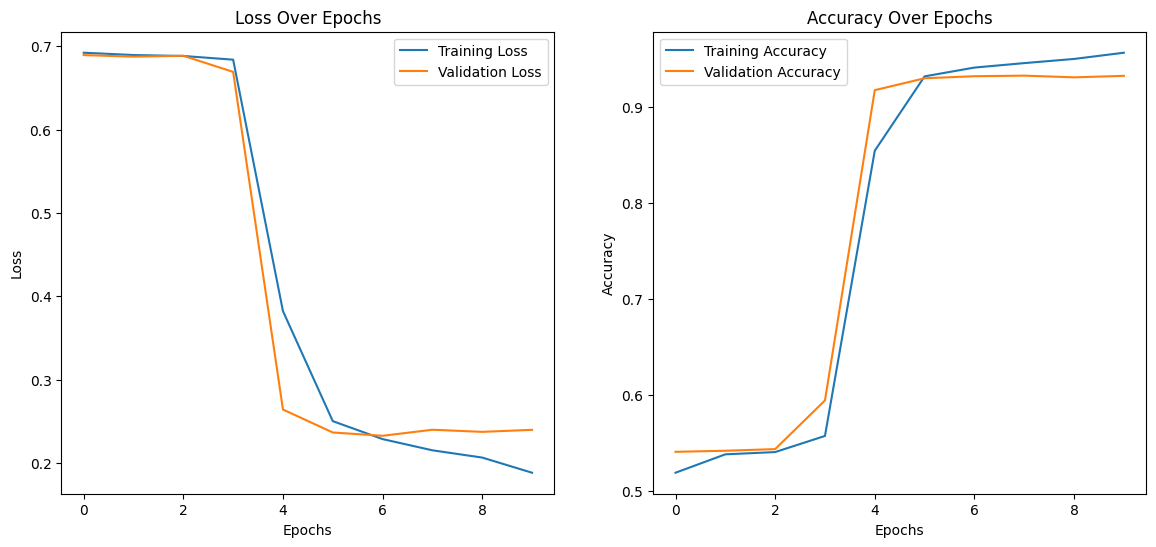

In [10]:
import matplotlib.pyplot as plt

# Plotting training & validation loss
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Sentence Embeddings

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Concatenate, Reshape
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sentence_transformers import SentenceTransformer

with open("C:/Yee Ann/NUS/DSA4266/TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv") as file:
    df = pd.read_csv(file)

#remove columns with single unique value
df = df.drop(columns = ['Unnamed: 0', 'BinaryNumTarget'])
df = df.loc[:, df.nunique() > 1]
df = df.drop_duplicates()

# Convert boolean columns to 0 and 1
df['majority_target'] = df['majority_target'].astype(int)

# Load pre-trained sentence transformer model
model_sbert = SentenceTransformer('all-MiniLM-L6-v2')

# Generate sentence embeddings for the 'tweet' column
X_tweet_embeddings = model_sbert.encode(df['tweet'].tolist(), convert_to_numpy=True)

# Separate the numerical features
numerical_features = df.select_dtypes(['int64', 'int32', 'float64']).columns.tolist()
numerical_features.remove('majority_target')
X_num = df[numerical_features].values

# Scale the numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Define inputs for tweet embeddings and numerical features
input_tweet = Input(shape=(X_tweet_embeddings.shape[1],))  # Shape for precomputed embeddings
input_numerical = Input(shape=(X_num_scaled.shape[1],))

# Reshape embeddings to add timestep dimension for LSTM
reshaped_tweet = Reshape((1, X_tweet_embeddings.shape[1]))(input_tweet)  # Shape: (batch_size, 1, 384)

# Apply LSTM to tweet embeddings
lstm_tweet = LSTM(128, return_sequences=False)(reshaped_tweet)

# Combine LSTM output and numerical features
combined = Concatenate()([lstm_tweet, input_numerical])

# Dense layers for classification
x = Dense(64, activation='relu')(combined)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=[input_tweet, input_numerical], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split data into training and test sets
X_train_tweet, X_test_tweet, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_tweet_embeddings, X_num_scaled, df['majority_target'], test_size=0.3, random_state=42)

# Callbacks for training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit([X_train_tweet, X_train_num], y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate([X_test_tweet, X_test_num], y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on test data
y_pred = model.predict([X_test_tweet, X_test_num])
y_pred_use = (y_pred > 0.5).astype(int)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred_use)
print(f"RNN Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred_use, average='weighted')
print(f"RNN F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_use, target_names=['Fake', 'Real']))

# Confusion Matrix to understand predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_use))

c:\Users\laiye\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange



Epoch 1/10


c:\Users\laiye\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


2349/2349 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7320 - loss: 0.5412 - val_accuracy: 0.8372 - val_loss: 0.3958 - learning_rate: 0.0010
Epoch 2/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8439 - loss: 0.3940 - val_accuracy: 0.8696 - val_loss: 0.3424 - learning_rate: 0.0010
Epoch 3/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8777 - loss: 0.3448 - val_accuracy: 0.8883 - val_loss: 0.3139 - learning_rate: 0.0010
Epoch 4/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8926 - loss: 0.3168 - val_accuracy: 0.8968 - val_loss: 0.2959 - learning_rate: 0.0010
Epoch 5/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9050 - loss: 0.2896 - val_accuracy: 0.9009 - val_loss: 0.2885 - learning_rate: 0.0010
Epoch 6/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9109 - loss: 0.2799 - val_accuracy: 0.9060 - val_loss: 0.2797 - learning_rate: 0.0010
Epoch 7/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9147 - loss: 0.26

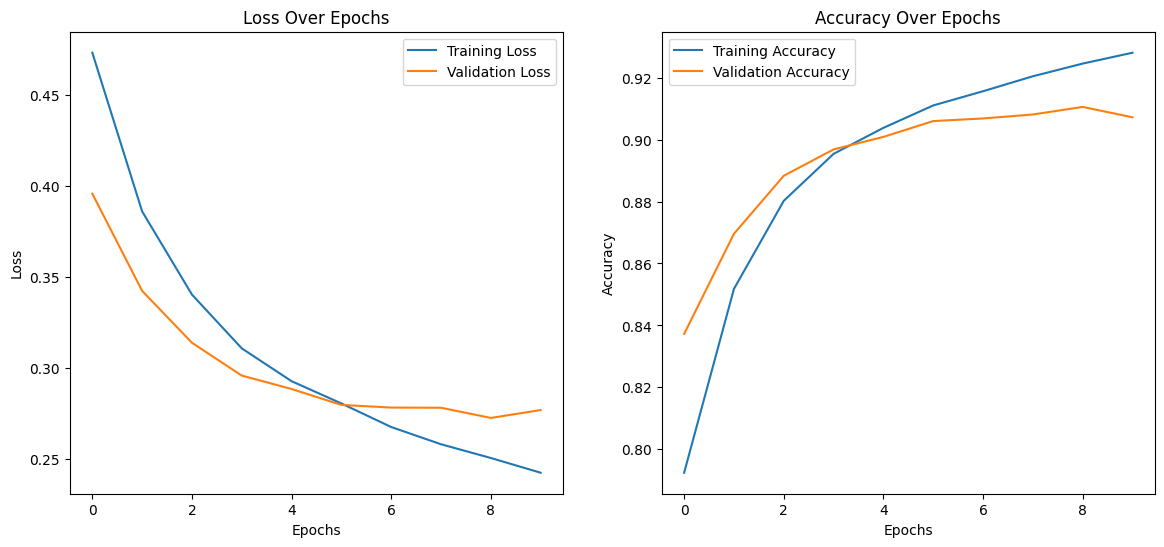

In [2]:
import matplotlib.pyplot as plt

# Plotting training & validation loss
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Sentence embeddings + BatchNormalization & regularizer

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Concatenate, Reshape, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sentence_transformers import SentenceTransformer

with open("C:/Yee Ann/NUS/DSA4266/TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv") as file:
    df = pd.read_csv(file)

#remove columns with single unique value
df = df.drop(columns = ['Unnamed: 0', 'BinaryNumTarget'])
df = df.loc[:, df.nunique() > 1]
df = df.drop_duplicates()

# Convert boolean columns to 0 and 1
df['majority_target'] = df['majority_target'].astype(int)

# Load pre-trained sentence transformer model
model_sbert = SentenceTransformer('all-MiniLM-L6-v2')

# Generate sentence embeddings for the 'tweet' column
X_tweet_embeddings = model_sbert.encode(df['tweet'].tolist(), convert_to_numpy=True)

numerical_features = df.select_dtypes(['int64', 'int32', 'float64']).columns.tolist()
numerical_features.remove('majority_target')
X_num = df[numerical_features].values

# Scale the numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Define inputs for tweet embeddings and numerical features
input_tweet = Input(shape=(X_tweet_embeddings.shape[1],))  # Shape for precomputed embeddings
input_numerical = Input(shape=(X_num_scaled.shape[1],))

# Reshape embeddings to add timestep dimension for LSTM
reshaped_tweet = Reshape((1, X_tweet_embeddings.shape[1]))(input_tweet)  # Shape: (batch_size, 1, 384)

# Apply LSTM to tweet embeddings
lstm_tweet = LSTM(128, return_sequences=False)(reshaped_tweet)

# Combine LSTM output and numerical features
combined = Concatenate()([lstm_tweet, input_numerical])

# Dense layers for classification
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(combined)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=[input_tweet, input_numerical], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Split data into training and test sets
X_train_tweet, X_test_tweet, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_tweet_embeddings, X_num_scaled, df['majority_target'], test_size=0.3, random_state=42)

# Callbacks for training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit([X_train_tweet, X_train_num], y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate([X_test_tweet, X_test_num], y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on test data
y_pred = model.predict([X_test_tweet, X_test_num])
y_pred_use = (y_pred > 0.5).astype(int)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred_use)
print(f"RNN Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred_use, average='weighted')
print(f"RNN F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_use, target_names=['Fake', 'Real']))

# Confusion Matrix to understand predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_use))

Epoch 1/10


c:\Users\laiye\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_10', 'keras_tensor_11']. Received: the structure of inputs=('*', '*')
  warnings.warn(


2349/2349 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6739 - loss: 0.8396 - val_accuracy: 0.8236 - val_loss: 0.4389 - learning_rate: 0.0010
Epoch 2/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8230 - loss: 0.4607 - val_accuracy: 0.8345 - val_loss: 0.4195 - learning_rate: 0.0010
Epoch 3/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8422 - loss: 0.4307 - val_accuracy: 0.8645 - val_loss: 0.3817 - learning_rate: 0.0010
Epoch 4/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8602 - loss: 0.4044 - val_accuracy: 0.8780 - val_loss: 0.3573 - learning_rate: 0.0010
Epoch 5/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8752 - loss: 0.3795 - val_accuracy: 0.8842 - val_loss: 0.3461 - learning_rate: 0.0010
Epoch 6/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8815 - loss: 0.3700 - val_accuracy: 0.8864 - val_loss: 0.3411 - learning_rate: 0.0010
Epoch 7/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8860 - loss: 0.35

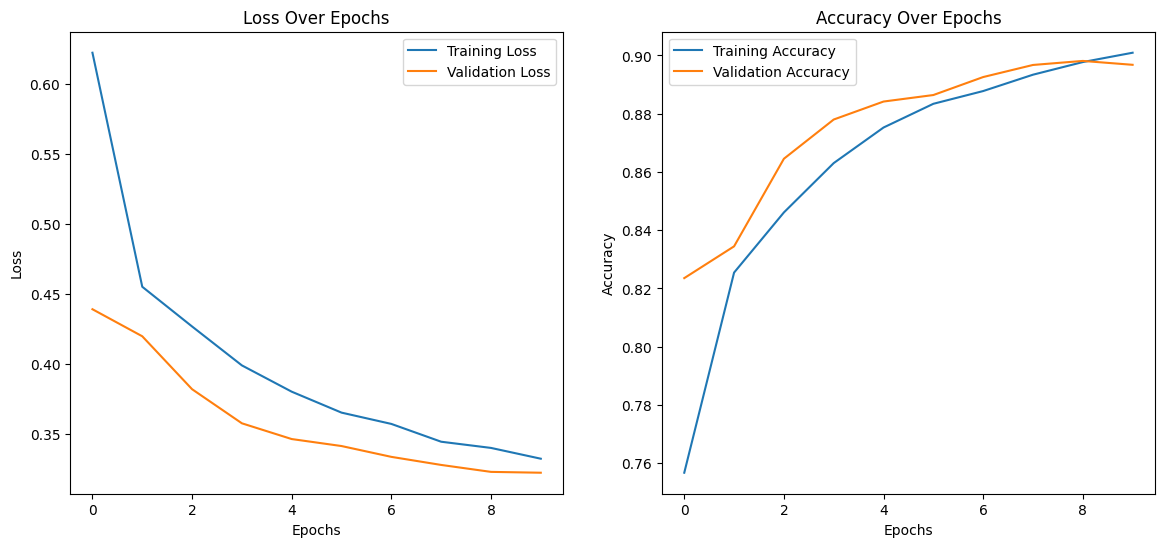

In [4]:
import matplotlib.pyplot as plt

# Plotting training & validation loss
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Bidirection RNN

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Concatenate, Reshape, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sentence_transformers import SentenceTransformer

with open("C:/Yee Ann/NUS/DSA4266/TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv") as file:
    df = pd.read_csv(file)

#remove columns with single unique value
df = df.drop(columns = ['Unnamed: 0', 'BinaryNumTarget'])
df = df.loc[:, df.nunique() > 1]
df = df.drop_duplicates()

# Convert boolean columns to 0 and 1
df['majority_target'] = df['majority_target'].astype(int)

# Load pre-trained sentence transformer model
model_sbert = SentenceTransformer('all-MiniLM-L6-v2')

# Generate sentence embeddings for the 'tweet' column
X_tweet_embeddings = model_sbert.encode(df['tweet'].tolist(), convert_to_numpy=True)

# Separate the numerical features
numerical_features = df.select_dtypes(['int64', 'int32', 'float64']).columns.tolist()
numerical_features.remove('majority_target')
X_num = df[numerical_features].values

# Scale the numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Define inputs for statement, tweet, and numerical features
input_tweet = Input(shape=(X_tweet_embeddings.shape[1],))
input_numerical = Input(shape=(X_num_scaled.shape[1],))

# Reshape to 3D for LSTM (adding a dimension for timesteps)
reshaped_tweet = Reshape((1, X_tweet_embeddings.shape[1]))(input_tweet)  # Shape: (batch_size, 1, 384)

# Bidirectional LSTM for tweet embeddings
bidirectional_lstm_tweet = Bidirectional(LSTM(128, return_sequences=False))(reshaped_tweet)

# Combine LSTM outputs and numerical features
combined = Concatenate()([bidirectional_lstm_tweet, input_numerical])

# Add dense layers
x = Dense(64, activation='relu')(combined)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=[input_tweet, input_numerical], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split data into training and test sets
X_train_tweet, X_test_tweet, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_tweet_embeddings, X_num_scaled, df['majority_target'], test_size=0.3, random_state=42)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit([X_train_tweet, X_train_num], y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate([X_test_tweet, X_test_num], y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on test data
y_pred = model.predict([X_test_tweet, X_test_num])

y_pred_use = (y_pred > 0.5).astype(int)
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred_use)
print(f"RNN Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred_use, average='weighted')
print(f"RNN F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_use, target_names=['Fake', 'Real']))

# Confusion Matrix to understand predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_use))

Epoch 1/10


c:\Users\laiye\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_21', 'keras_tensor_22']. Received: the structure of inputs=('*', '*')
  warnings.warn(


2349/2349 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7474 - loss: 0.5233 - val_accuracy: 0.8504 - val_loss: 0.3795 - learning_rate: 0.0010
Epoch 2/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8572 - loss: 0.3796 - val_accuracy: 0.8779 - val_loss: 0.3283 - learning_rate: 0.0010
Epoch 3/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8863 - loss: 0.3287 - val_accuracy: 0.8944 - val_loss: 0.3012 - learning_rate: 0.0010
Epoch 4/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9022 - loss: 0.2981 - val_accuracy: 0.9004 - val_loss: 0.2894 - learning_rate: 0.0010
Epoch 5/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9120 - loss: 0.2773 - val_accuracy: 0.9056 - val_loss: 0.2793 - learning_rate: 0.0010
Epoch 6/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9175 - loss: 0.2628 - val_accuracy: 0.9087 - val_loss: 0.2741 - learning_rate: 0.0010
Epoch 7/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9219 - loss:

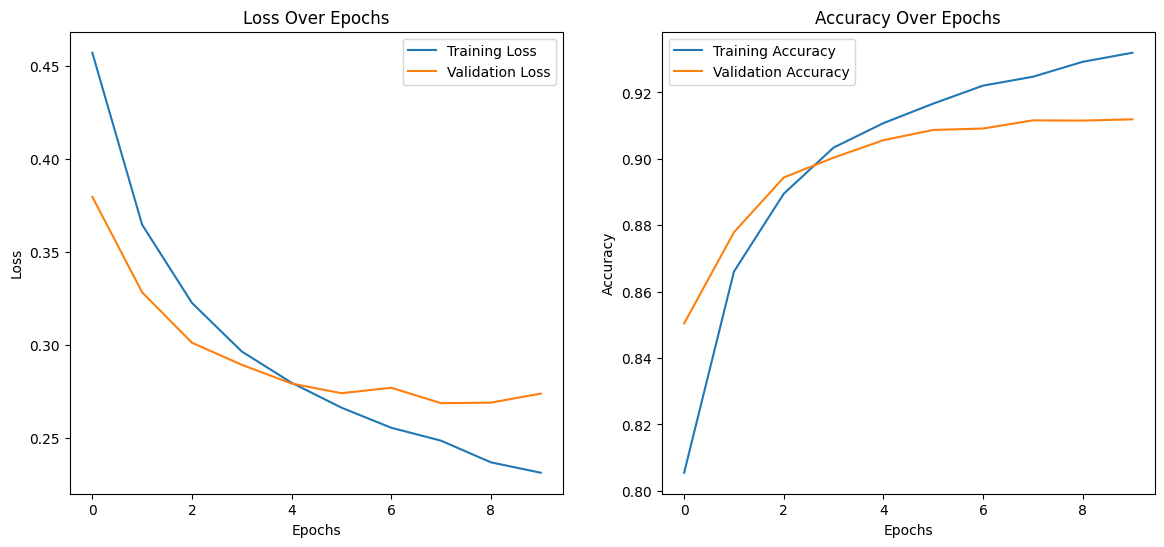

In [6]:
import matplotlib.pyplot as plt

# Plotting training & validation loss
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Bidirection RNN + BatchNormalization & regularizer

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Concatenate, Reshape, BatchNormalization, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sentence_transformers import SentenceTransformer

with open("C:/Yee Ann/NUS/DSA4266/TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv") as file:
    df = pd.read_csv(file)

#remove columns with single unique value
df = df.drop(columns = ['Unnamed: 0', 'BinaryNumTarget'])
df = df.loc[:, df.nunique() > 1]
df = df.drop_duplicates()

# Convert boolean columns to 0 and 1
df['majority_target'] = df['majority_target'].astype(int)

# Load pre-trained sentence transformer model
model_sbert = SentenceTransformer('all-MiniLM-L6-v2')

# Generate sentence embeddings for the 'tweet' column
X_tweet_embeddings = model_sbert.encode(df['tweet'].tolist(), convert_to_numpy=True)

# Separate the numerical features
numerical_features = df.select_dtypes(['int64', 'int32', 'float64']).columns.tolist()
numerical_features.remove('majority_target')
X_num = df[numerical_features].values

# Scale the numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Define inputs for statement, tweet, and numerical features
input_tweet = Input(shape=(X_tweet_embeddings.shape[1],))
input_numerical = Input(shape=(X_num_scaled.shape[1],))

# Reshape to 3D for LSTM (adding a dimension for timesteps)
reshaped_tweet = Reshape((1, X_tweet_embeddings.shape[1]))(input_tweet)  # Shape: (batch_size, 1, 384)

# Bidirectional LSTM for tweet embeddings
bidirectional_lstm_tweet = Bidirectional(LSTM(128, return_sequences=False))(reshaped_tweet)

# Combine LSTM outputs and numerical features
combined = Concatenate()([bidirectional_lstm_tweet, input_numerical])

# Add dense layers
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(combined)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=[input_tweet, input_numerical], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split data into training and test sets
X_train_tweet, X_test_tweet, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_tweet_embeddings, X_num_scaled, df['majority_target'], test_size=0.3, random_state=42)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit([X_train_tweet, X_train_num], y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate([X_test_tweet, X_test_num], y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on test data
y_pred = model.predict([X_test_tweet, X_test_num])

y_pred_use = (y_pred > 0.5).astype(int)
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred_use)
print(f"RNN Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred_use, average='weighted')
print(f"RNN F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_use, target_names=['Fake', 'Real']))

# Confusion Matrix to understand predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_use))

Epoch 1/10


c:\Users\laiye\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_31', 'keras_tensor_32']. Received: the structure of inputs=('*', '*')
  warnings.warn(


2349/2349 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6882 - loss: 0.7890 - val_accuracy: 0.8252 - val_loss: 0.4382 - learning_rate: 0.0010
Epoch 2/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8244 - loss: 0.4578 - val_accuracy: 0.8521 - val_loss: 0.4017 - learning_rate: 0.0010
Epoch 3/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8478 - loss: 0.4250 - val_accuracy: 0.8644 - val_loss: 0.3802 - learning_rate: 0.0010
Epoch 4/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8676 - loss: 0.3926 - val_accuracy: 0.8737 - val_loss: 0.3633 - learning_rate: 0.0010
Epoch 5/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8792 - loss: 0.3755 - val_accuracy: 0.8871 - val_loss: 0.3441 - learning_rate: 0.0010
Epoch 6/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8876 - loss: 0.3573 - val_accuracy: 0.8920 - val_loss: 0.3321 - learning_rate: 0.0010
Epoch 7/10
2349/2349 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8948 - loss: 0.34

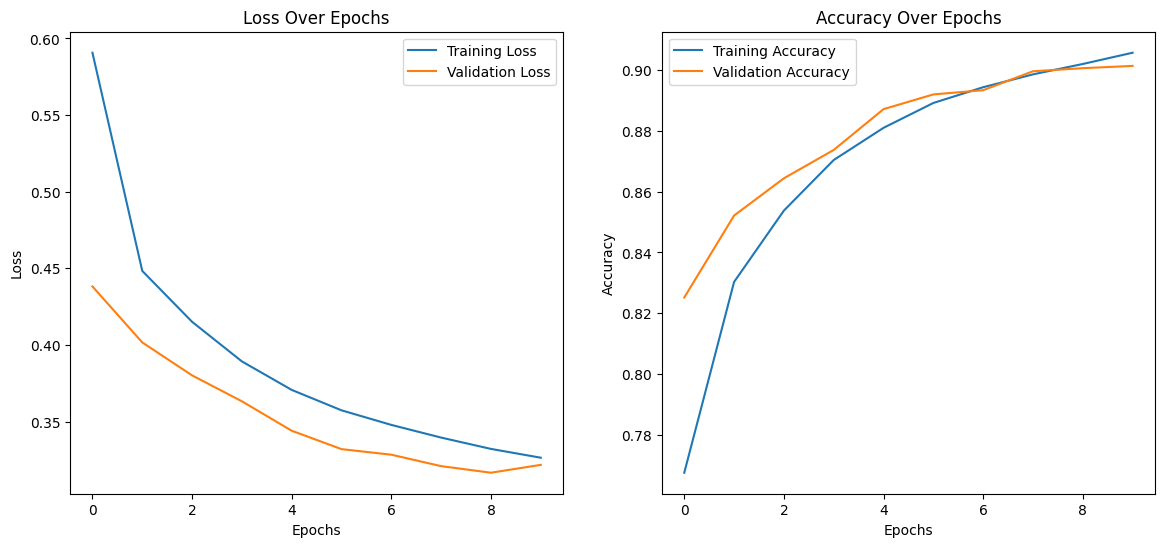

In [8]:
import matplotlib.pyplot as plt

# Plotting training & validation loss
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show() 